# Proyek Analisis Data : day

- Nama         : Harun Deppalallo
- Email        : harundeppalallo@gmail.com
- Id Dicoding  : https://www.dicoding.com/users/harun_deppalallo/academies

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penyewaan sepeda dalam 2 tahun terakhir?
- Bagaimana kondisi cuaca yang paling optimal untuk melakukan Bisnis Penyewaan sepeda?
- Berapakah total Penyewaan sepeda di setiap musimnya?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Memuat tabel day_df

In [2]:
day_df = pd.read_csv("day.csv")
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


### Asessing Data

#### Menilai data day_df

In [3]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object. Masalah ini akan diselesaiakn di proses cleaning data.

##### Menampilkan jumlah missing value dala setiap kolom

In [4]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Output di atas menunjukkan bahwa tidak terdapat missing value dalam data day_df

##### Memeriksa duplikasi dalam data

In [5]:
print("Jumlah duplikasi:", day_df.duplicated().sum())

Jumlah duplikasi: 0


Output diatas menunjukkan bahwa tidak terdapat adanya data duplikat

In [6]:
 day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##### Rangkuman identifikasi masalah pada data-data diatas

- Tipe Data        : Terdapat kesalahan tipe data kolom dteday

Ada beberapa elemen variabel yang perlu diganti sesuai dengan keterangan yang terdapat dalam dataset

- season : (1:springer, 2:summer, 3:fall, 4:winter)
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 

		1: Clear, Few clouds, Partly cloudy, Partly cloudy
        
		2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        
		3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        
		4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

### Cleaning Data
#### Mengubah tipe data pada kolom dteday

In [7]:
datetime_columns = ["dteday"]

for column in datetime_columns :
    day_df[column] = pd.to_datetime(day_df[column])

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Output diatas memperlihatkan tipe data variabel dteday yang awalnya bertipe object telah berubah menjadi data time.

#### Mengubah elemen variabel

- Mengganti elemen Variabel season berdasarkan keterangan seasosn yang terdapat di Note
season (1 : springer, 2 : summer, 3 : fall, 4 : winter)

In [9]:
day_df['season'] = day_df['season'].replace([1, 2, 3, 4], ['springer', 'summer', 'fall', 'winter'])
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,springer,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,springer,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,springer,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,springer,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


- Mengganti elemen Variabel workingday berdasarkan keterangan seasosn yang terdapat di Note
workingday (0 : holiday, 1 : working)

In [10]:
day_df['workingday'] = day_df['workingday'].replace([0, 1], ['weekend or holiday', 'working'])
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,0,1,0,6,weekend or holiday,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,0,1,0,0,weekend or holiday,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,0,1,0,1,working,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,0,1,0,2,working,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,0,1,0,3,working,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,springer,1,12,0,4,working,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,springer,1,12,0,5,working,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,springer,1,12,0,6,weekend or holiday,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,springer,1,12,0,0,weekend or holiday,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


- menngganti elemen weathersit dengan keterangan seperti berikut: 

		1: Clear, Few clouds, Partly cloudy, Partly cloudy
        
		2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        
		3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        
		4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [11]:
day_df['weathersit'] = day_df['weathersit'].replace([1, 2, 3, 4],
                                                    ['Clear, Few clouds, Partly cloudy, Partly cloudy',
                                                     'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                                                     'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
                                                     'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'])
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,0,1,0,6,weekend or holiday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,0,1,0,0,weekend or holiday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,0,1,0,1,working,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,0,1,0,2,working,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,0,1,0,3,working,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,springer,1,12,0,4,working,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,springer,1,12,0,5,working,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,springer,1,12,0,6,weekend or holiday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,springer,1,12,0,0,weekend or holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [12]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,0,1,0,6,weekend or holiday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,0,1,0,0,weekend or holiday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,0,1,0,1,working,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,0,1,0,2,working,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,0,1,0,3,working,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,springer,1,12,0,4,working,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,springer,1,12,0,5,working,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,springer,1,12,0,6,weekend or holiday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,springer,1,12,0,0,weekend or holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

In [14]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,NaN,NaN,NaN,NaN,working,"Clear, Few clouds, Partly cloudy, Partly cloudy",NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,NaN,NaN,NaN,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,0.500684,6.519836,0.028728,2.997264,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,0.000000,4.000000,0.000000,1.000000,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,1.000000,7.000000,0.000000,3.000000,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,1.000000,10.000000,0.000000,5.000000,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,12.000000,1.000000,6.000000,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Proses persewaan sepeda sangat berkorelasi dengan kondisi lingkungan dan musim. Misalnya, kondisi cuaca,
curah hujan, hari dalam seminggu, musim, jam dalam sehari, dll. dapat mempengaruhi perilaku sewa. Kumpulan data inti terkait dengan
catatan sejarah dua tahun yang sesuai dengan tahun 2011 dan 2012 dari sistem Capital Bikeshare, Washington D.C., AS.

Berdasarkan rangkuman parameter statistik di atas, kita memperoleh informasi kondisi cuaca pada proses persewaan sepeda dalam 731 hari di 4 musim yang berbeda. Informasi ini juga memberikan kita informasi total penyewaan sepeda dalam 4 musim di tahun 2011 sampai 2012.

Sekarang kita akan melihat ringkasan informasi suhu, kelembapan udara dan kecepatan angin berdasarkan season(musim). Kita melakukannya dengan menggunakan method groupby() yang diikuti dengan method agg(). 

In [15]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "temp":["max", "min", "mean"],
    "hum":["max", "min", "mean"],
    "windspeed": ["max", "min", "mean"],
})

instant      temp                           hum                      \
         nunique       max       min      mean       max       min      mean   
season                                                                         
fall         188  0.861667  0.469167  0.706309  0.939565  0.360000  0.633482   
springer     181  0.572500  0.059130  0.297748  0.948261  0.000000  0.582903   
summer       184  0.808333  0.253043  0.544405  0.922500  0.254167  0.626948   
winter       178  0.657500  0.220833  0.422906  0.972500  0.333478  0.668719   

         windspeed                      
               max       min      mean  
season                                  
fall      0.375617  0.064071  0.172095  
springer  0.507463  0.045408  0.214537  
summer    0.388067  0.065929  0.203507  
winter    0.422275  0.022392  0.171995

Berdasarkan output diatas, rata-rata temperatur tertinggi di musim gugur, kelembapan udara terendah di musim semi dan rata-rata kecepatan angin di musim gugur dan musim dingin hampir sama, begitu juga dengan musim semi dan musim panas

Selanjutnya kita akan melihat informasi Persewaan sepeda berdasarkan data 

- Total penyewaan sepeda berdasarkan variabel workingday (hari kerja dan hari libur)

In [16]:
day_df.groupby(by="workingday").cnt.sum().sort_values(ascending=False)

workingday
working               2292410
weekend or holiday    1000269
Name: cnt, dtype: int64

- Total penyewaan sepeda berdasarkan weathersit(kondisi cuaca)

In [17]:
day_df.groupby(by="weathersit").cnt.sum().sort_values(ascending=False)

weathersit
Clear, Few clouds, Partly cloudy, Partly cloudy                                            2257952
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                                996858
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds      37869
Name: cnt, dtype: int64

- Total penyewaan sepeda dalam setiap musimnya

In [18]:
day_df.groupby(by="season").cnt.sum().sort_values(ascending=False)

season
fall        1061129
summer       918589
winter       841613
springer     471348
Name: cnt, dtype: int64

## Visualization and Explanatory Analysis

Saya akan membagi data day_df berdasarkan tahun untuk digunakan dalam visualisasi data tahunan

In [19]:
# Memilih data day_df berdasarkan tahun 2011
bike_2011 = day_df[(day_df['dteday'] < "2012-01-01")]

monthly_2011 = bike_2011.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})
monthly_2011.index = monthly_2011.index.strftime('%B') #mengubah format order date menjadi nama bulan
 
monthly_2011 = monthly_2011.reset_index()
monthly_2011.rename(columns={
    "cnt": "Total_cnt"
}, inplace=True)


# Memilih data day_df berdasarkan tahun 2012
bike_2012 = day_df[(day_df['dteday'] > "2011-12-31")]

monthly_2012 = bike_2012.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})
monthly_2012.index = monthly_2012.index.strftime('%B') #mengubah format order date menjadi nama bulan
 
monthly_2012 = monthly_2012.reset_index()
monthly_2012.rename(columns={
    "cnt": "Total_cnt"
}, inplace=True)



##### Melihan performa penyewaan sepeda dalam 2 tahun terakhir

Text(0.5, 0.98, 'Count of total rental Bikes per Month')

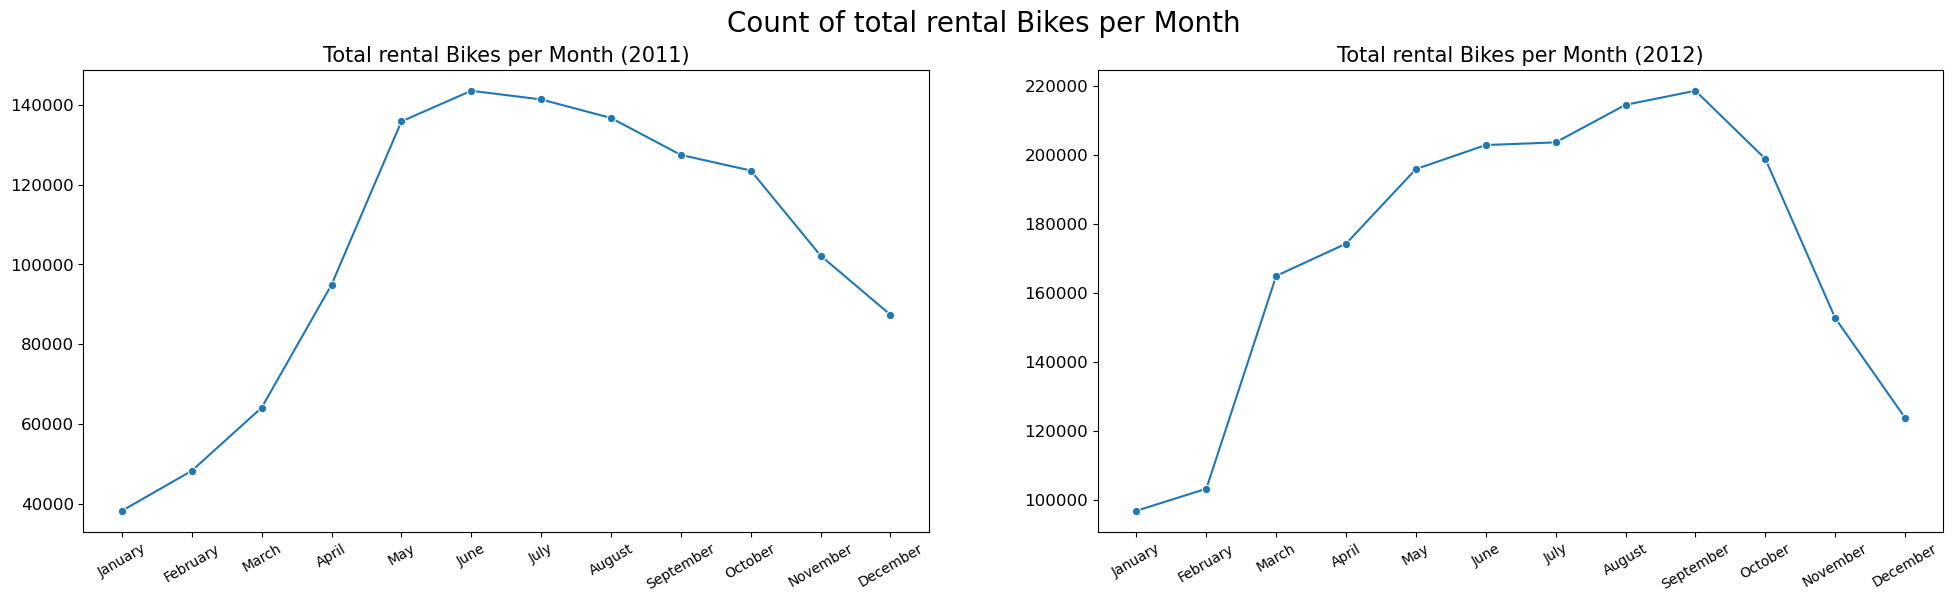

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.lineplot(x="dteday", y="Total_cnt", data=monthly_2011.head(12), marker='o', ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Total rental Bikes per Month (2011)", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
ax[0].tick_params(axis ='x', rotation=30)

sns.lineplot(x="dteday", y="Total_cnt", data=monthly_2012.head(12), marker='o', ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Total rental Bikes per Month (2012)", loc="center", fontsize=15)
ax[1].tick_params(axis ='y', labelsize=12)
ax[1].tick_params(axis ='x', rotation=30)

plt.suptitle("Count of total rental Bikes per Month", fontsize=20)

##

##### Penyewaan sepeda berdasarkan keadaan cuaca

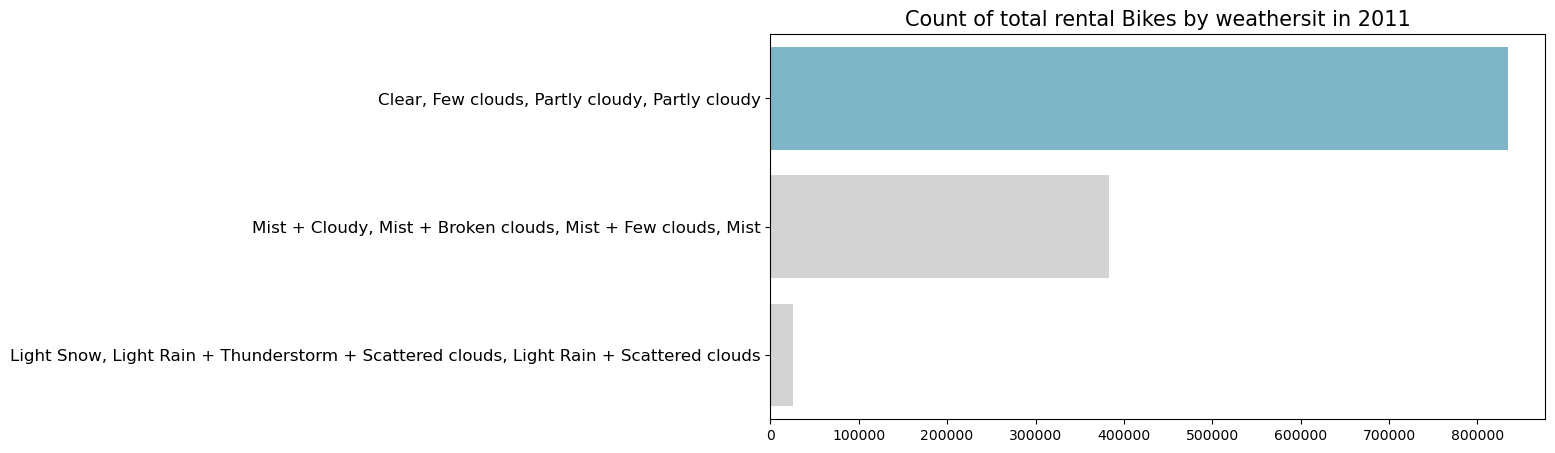

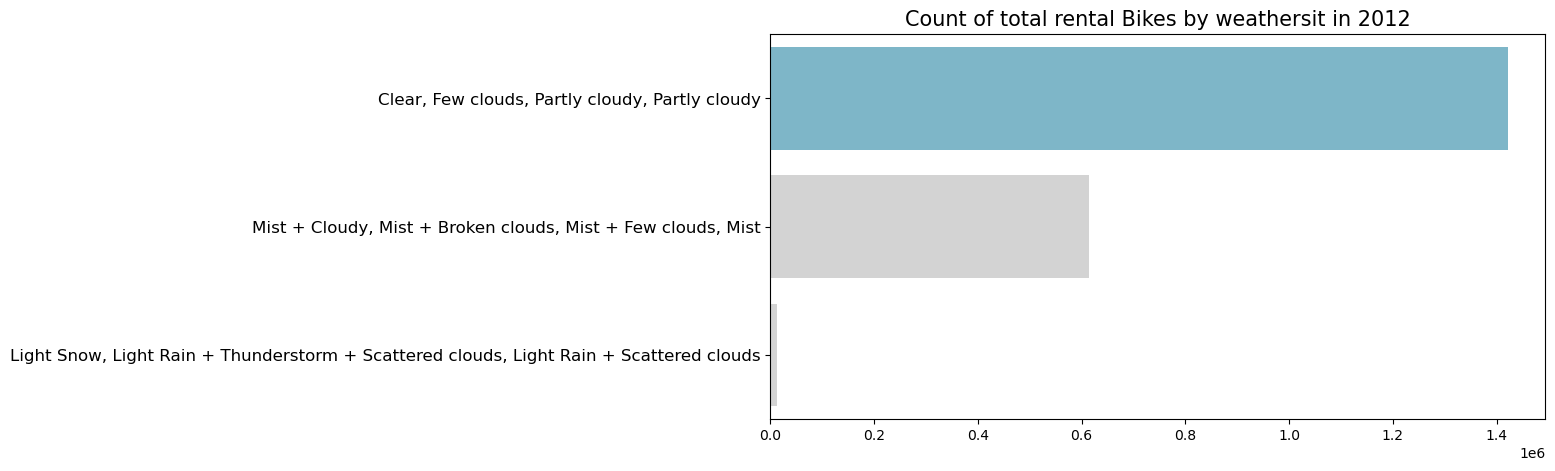

In [22]:
weathersit2012_df = bike_2012.groupby(by="weathersit").cnt.sum().reset_index()
weathersit2012_df.rename(columns={
    "cnt": "Total_cnt"
}, inplace=True)
weathersit2012_df

colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(10, 5))

sns.barplot(
    x="Total_cnt",
    y="weathersit",
    data=weathersit2012_df.sort_values(by="Total_cnt", ascending=False),
    palette=colors_
)

plt.title("Count of total rental Bikes by weathersit in 2012", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [23]:
weathersit_df = day_df.groupby(by="weathersit").cnt.sum().reset_index()
weathersit_df.rename(columns={
    "cnt": "Total_cnt"
}, inplace=True)
weathersit_df

,weathersit,Total_cnt
0,"Clear, Few clouds, Partly cloudy, Partly cloudy",2257952
1,"Light Snow, Light Rain + Thunderstorm + Scatte...",37869
2,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",996858


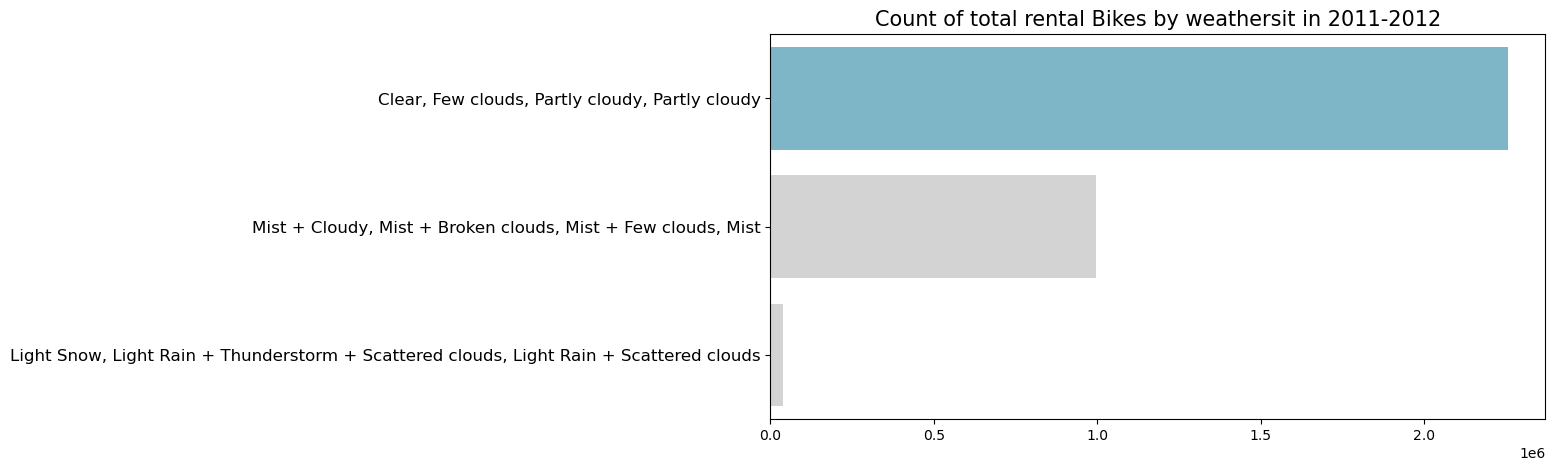

In [24]:
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(10, 5))

sns.barplot(
    x="Total_cnt",
    y="weathersit",
    data=weathersit_df.sort_values(by="Total_cnt", ascending=False),
    palette=colors_
)

plt.title("Count of total rental Bikes by weathersit in 2011-2012", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

##

##### Total penyewaan sepeda dalam setiap musim

In [25]:
# Total cnt berdasarkan season 2011
season2011_df = bike_2011.groupby(by="season").cnt.sum().reset_index()
season2011_df.rename(columns={
    "cnt": "Total_cnt"
}, inplace=True)

# Total cnt berdasarkan season 2012
season2012_df = bike_2012.groupby(by="season").cnt.sum().reset_index()
season2012_df.rename(columns={
    "cnt": "Total_cnt"
}, inplace=True)

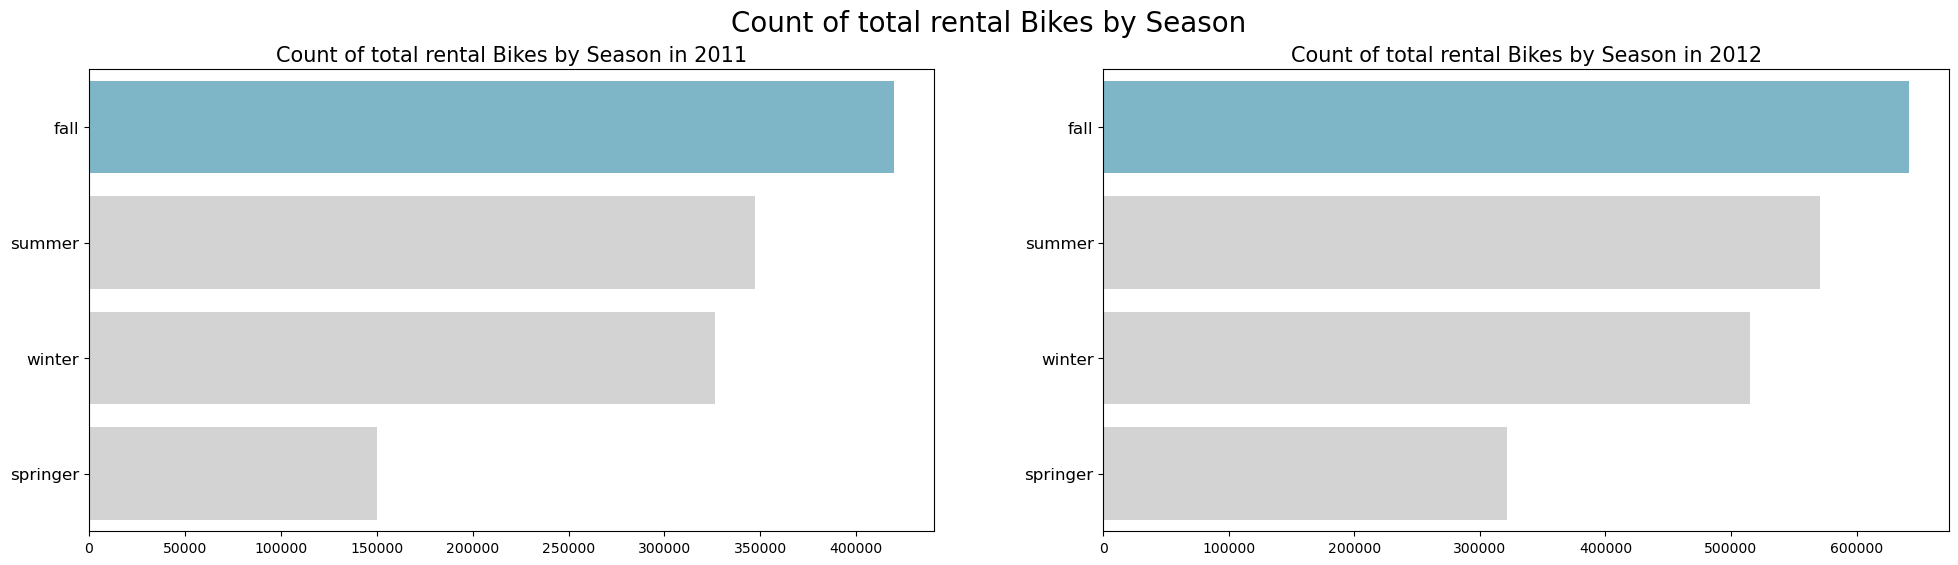

In [26]:
# Membuat Grafik penyewaan grafik setiap musim
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="Total_cnt", y="season", data=season2011_df.sort_values(by="Total_cnt", ascending=False), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Count of total rental Bikes by Season in 2011", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="Total_cnt", y="season", data=season2012_df.sort_values(by="Total_cnt", ascending=False), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Count of total rental Bikes by Season in 2012", loc="center", fontsize=15)
ax[1].tick_params(axis ='y', labelsize=12)

plt.suptitle("Count of total rental Bikes by Season", fontsize=20)
plt.show()

In [27]:
season_df = day_df.groupby(by="season").cnt.sum().reset_index()
season_df.rename(columns={
    "cnt": "Total_cnt"
}, inplace=True)
season_df

,season,Total_cnt
0,fall,1061129
1,springer,471348
2,summer,918589
3,winter,841613


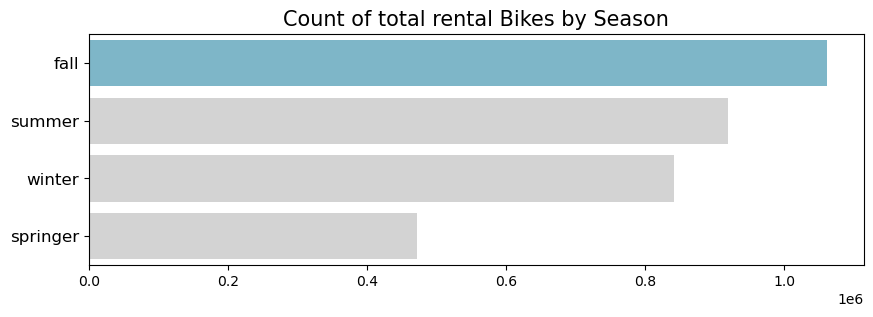

In [28]:
colors_season = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(10, 3))

sns.barplot(
    x="Total_cnt",
    y="season",
    data=season_df.sort_values(by="Total_cnt", ascending=False),
    palette=colors_season
)

plt.title("Count of total rental Bikes by Season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Conclusion

- Bagaimana performa penyewaan sepeda dalam 2 tahun terakhir?

Total Penyewaan sepeda di tahun 2011 terendah di bulan Januari dan tertinggi di bulan Juni, sedangkan pada tahun 2012 tertinggi di bulan September dan terendah di bulan Januari. Total penyewaan sepeda tahun 2012 lebih tinggi dibandingkan tahun 2011, oleh karena itu dapat disimpulkan bahwa penyewaan sepeda dari 2 tahun terakhir mengalami peningkatan.

- Bagaimana kondisi cuaca yang paling optimal untuk melakukan Bisnis Penyewaan sepeda?

Berdasarkan analisi yang telah dilakukan, kondisi cuaca yang paling optimal dalam penyewaan sepeda yaitu ketika Cuaca Cerah, Sedikit awan, Berawan sebagian (Clear, Few clouds, Partly cloudy)

- Berapakah total Penyewaan sepeda di setiap musimnya?

Total penyewaan sepeda per musim tahun 2011 (fall : 419650, springer : 150000, summer : 347316, winter : 326137). Total penyewaan sepeda per musim tahun 2012 (fall	: 641479, springer	: 321348, summer : 571273, winter : 515476). 

In [41]:
# day_df.to_csv('day_clean_df.csv', index=False)